In [27]:
from tensorflow.keras.datasets import imdb
import numpy as np

In [28]:
max_words=10000
max_sequence_length=900

In [29]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

In [30]:
# x_train[0]

In [31]:
y_train[0]

1

In [32]:
from tensorflow import keras

x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_sequence_length)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_sequence_length)

# If a sequence is shorter than 500 ,it pads it with zeros at the beginning (by default).
# If a sequence is longer than 500, it truncates the beginning and keeps the last 500 values.

In [33]:
# x_train[0]

In [34]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, GlobalMaxPooling1D

model = Sequential()
model.add(Embedding(max_words, 100, input_length=max_sequence_length))
model.add(GlobalMaxPooling1D())
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history=model.fit(x_train, y_train, batch_size=512, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10


C:\Users\Ashvini Mahajan\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


49/49 ━━━━━━━━━━━━━━━━━━━━ 25s 459ms/step - accuracy: 0.6020 - loss: 0.6726 - val_accuracy: 0.8041 - val_loss: 0.5609
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 23s 459ms/step - accuracy: 0.8184 - loss: 0.5126 - val_accuracy: 0.8374 - val_loss: 0.4011
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 22s 457ms/step - accuracy: 0.8538 - loss: 0.3678 - val_accuracy: 0.8570 - val_loss: 0.3366
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 23s 472ms/step - accuracy: 0.8818 - loss: 0.2928 - val_accuracy: 0.8695 - val_loss: 0.3046
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 24s 491ms/step - accuracy: 0.9005 - loss: 0.2519 - val_accuracy: 0.8757 - val_loss: 0.2917
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 24s 494ms/step - accuracy: 0.9188 - loss: 0.2153 - val_accuracy: 0.8793 - val_loss: 0.2849
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 24s 490ms/step - accuracy: 0.9313 - loss: 0.1903 - val_accuracy: 0.8804 - val_loss: 0.2816
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 40s 477ms/step - accuracy: 0.9438 - loss: 0.1628 - val_accuracy: 0.881

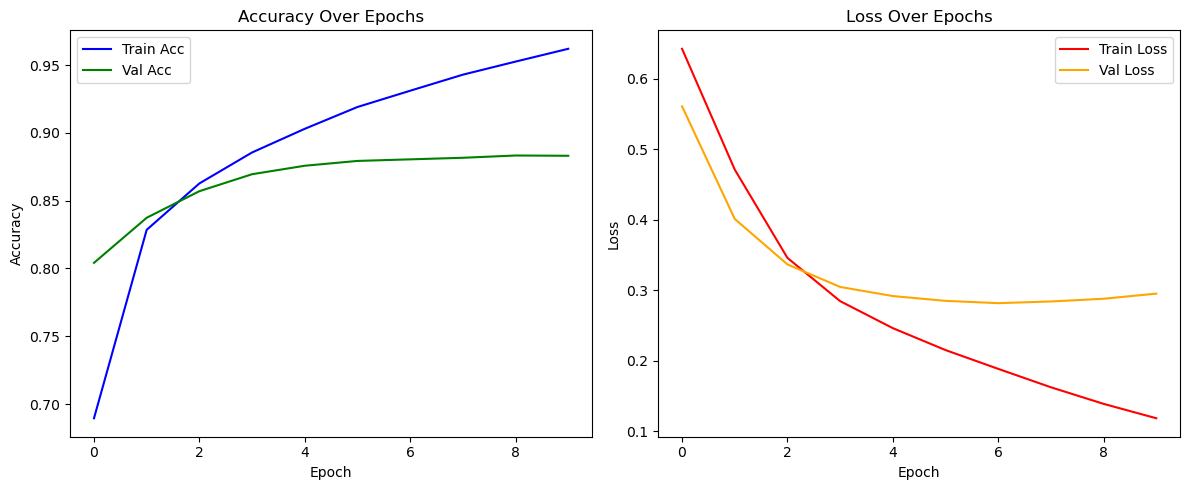

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc', color='blue')
plt.plot(history.history['val_accuracy'], label='Val Acc', color='green')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='red')
plt.plot(history.history['val_loss'], label='Val Loss', color='orange')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [36]:
# Evaluation

loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8816 - loss: 0.2946
Test Loss: 0.2951698899269104
Test Accuracy: 0.883080005645752


782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step


<Axes: >

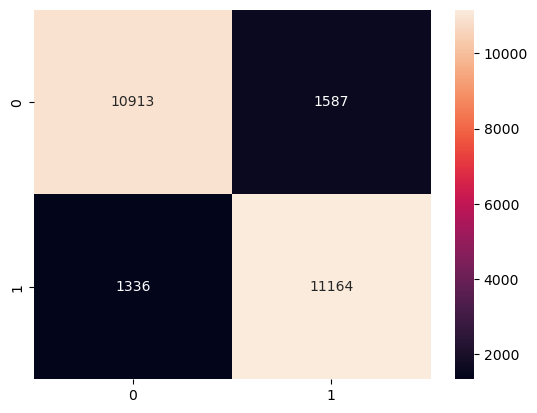

In [37]:
y_pred_probs = model.predict(x_test)
y_pred = (y_pred_probs > 0.5).astype(int)

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True,fmt='d')

In [38]:
classification_rep = classification_report(y_test, y_pred)
print("Classificatio Report")
print(classification_rep)

Classificatio Report
              precision    recall  f1-score   support

           0       0.89      0.87      0.88     12500
           1       0.88      0.89      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



In [39]:
# Sample Example

index=5

sample_review = x_test[index]
sample_review = sample_review.reshape(1, -1)

pred_prob = model.predict(sample_review)[0][0]
pred_label = int(pred_prob > 0.5)

print(f"Predicted Probability: {pred_prob}")
print("Predicted Sentiment:", "Positive" if pred_label == 1 else "Negative")
print("Actual Sentiment:","Positive" if y_test[index]==1 else "Negative")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Predicted Probability: 0.9580538272857666
Predicted Sentiment: Positive
Actual Sentiment: Positive
